# 🌸 Iris Classification using Neural Networks

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import math
import random
import copy

In [2]:
df = pd.read_csv("iris.data")
df.head()

sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [3]:
df.shape

(150, 5)

## EDA

In [4]:
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<AxesSubplot:>

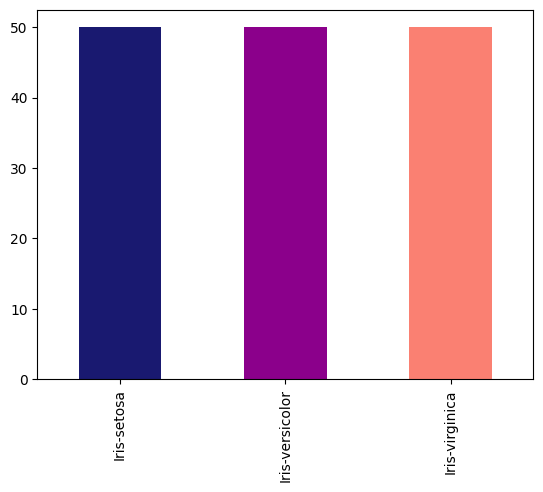

In [5]:
df["class"].value_counts().plot(kind = "bar", color = ["midnightblue", "darkmagenta", "salmon"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#Checking for missing value
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [8]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

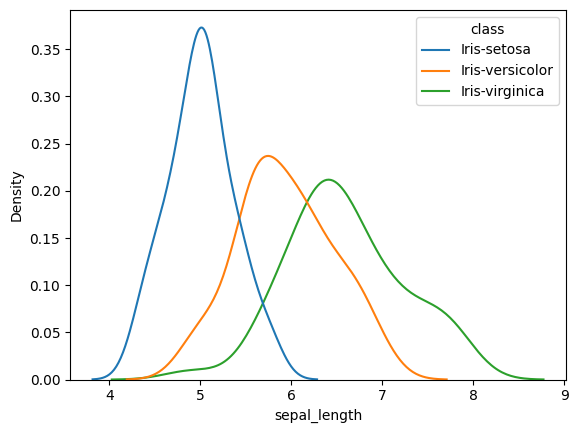

In [9]:
sns.kdeplot(data=df, x='sepal_length', hue='class');

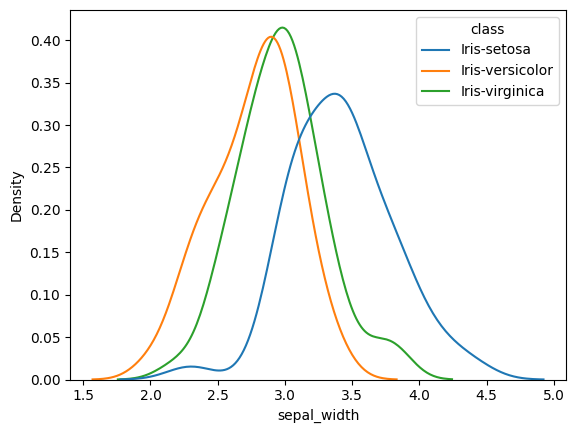

In [10]:
sns.kdeplot(data=df, x='sepal_width', hue='class');

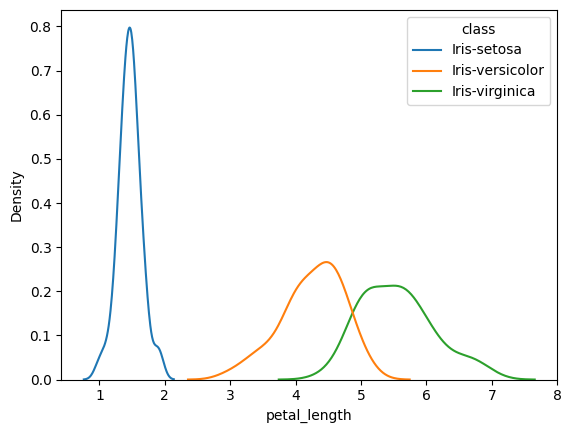

In [11]:
sns.kdeplot(data=df, x='petal_length', hue='class');

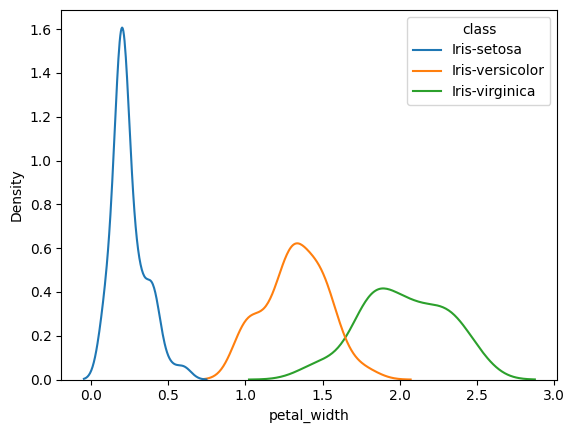

In [12]:
sns.kdeplot(data=df, x='petal_width', hue='class');

## Modelling

In [13]:
X = df.drop("class", axis = 1)
Y = df["class"]

In [14]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
Y = lab.fit_transform(Y)

In [15]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [16]:
X_train

sepal_length  sepal_width  petal_length  petal_width
56            6.3          3.3           4.7          1.6
104           6.5          3.0           5.8          2.2
69            5.6          2.5           3.9          1.1
55            5.7          2.8           4.5          1.3
132           6.4          2.8           5.6          2.2
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[135 rows x 4 columns]

In [17]:
Y_train

array([1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0,
       1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2,
       0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0,
       1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2,
       0, 1, 2])

In [18]:
def dense(dim1, dim2):
    #weights = np.random.normal(0, 1 / math.sqrt(dim1),size = (dim1, dim2))
    weights = np.random.rand(dim1, dim2) - 0.5
    bias = np.random.rand(1, dim2)
    return weights, bias

In [19]:
learning_rate = 0.001
epochs = 20

In [20]:
def sigmoid(a):
    return 1.0 / (1 + np.exp(-a))

In [21]:
def softmax(a):
    return np.exp(a) / np.sum(np.exp(a))

In [22]:
def activation_for_batch(Z_matrix,activation_function):
    list_with_activation=[]
    #print(Z_matrix.shape)
    for row in Z_matrix:
        list_with_activation.append(activation_function(row))
    return np.row_stack(list_with_activation)    

In [23]:
def accuracy(preds, true):
    #print(preds)
    preds_flattened = []
    for batch in preds:
        for _ in batch:
            preds_flattened.append(_)
    preds_flattened = np.array(preds_flattened)
    true = np.array(true)
    #print(preds_flattened)
    #print(true)
    return np.sum(preds_flattened == true) / true.size
    #return np.sum(preds == true) / true.size
    #return np.mean(preds==true)*100

In [24]:
def activation(input):
    predictions_list = []
    for row in input:
        predictions_list.append(np.argmax(row))
    return predictions_list

In [25]:
def shuffle(X_train, Y_train):
    for i in range(135):
        a = random.randrange(135)
        b = random.randrange(135)
        aux = copy.deepcopy(X_train.iloc[b])
        aux2 = copy.deepcopy(Y_train[b])
        X_train.iloc[b] = copy.deepcopy(X_train.iloc[a])
        Y_train[b] = copy.deepcopy(Y_train[a])
        X_train.iloc[a] = copy.deepcopy(aux)
        Y_train[a] = copy.deepcopy(aux2)

In [26]:
def score(X, Y, W_1, B_1, W_2, B_2):
    predictions = []
    for i in range(Y.shape[0]):
        Z_1 = np.dot(X.iloc[i],W_1) + B_1
        A_1=activation_for_batch(Z_1,sigmoid)
        Z_2 = np.dot(A_1, W_2) + B_2
        A_2 =activation_for_batch(Z_2,softmax)
        #activated_output = np.zeros((actual_batch_size, 10))
        #expected_result = np.zeros((actual_batch_size,10))
        Z = activation(A_2)
        predictions.append(Z)
    return accuracy(predictions, Y)

In [27]:
def mini_batch_train(X_train, Y_train, X_test, Y_test, epochs, learning_rate, batch_size):
    W_1, B_1 = dense(4, 20)
    W_2, B_2 = dense(20, 3)
    history = []
    test_score_per_epochs = []
    epoch = 1
    while epoch <= epochs:
        predictions = []
        shuffle(X_train, Y_train)
        no_batches = Y_train.shape[0]//batch_size + 1 if Y_train.shape[0]%batch_size != 0 else Y_train.shape[0]//batch_size
        for batch in range(no_batches):
            #Feed forward:
            Z_1 = np.dot(X_train.iloc[batch*batch_size:min(Y_train.shape[0],batch*batch_size+batch_size)], W_1) + B_1
            A_1=activation_for_batch(Z_1,sigmoid)
            Z_2 = np.dot(A_1, W_2) + B_2
            A_2 =activation_for_batch(Z_2,softmax)
    
            actual_batch_size = (Y_train.shape[0] - batch*batch_size) if batch*batch_size + batch_size > Y_train.shape[0] else batch_size
            
            activated_output = np.zeros((actual_batch_size, 3))
            expected_result = np.zeros((actual_batch_size, 3))
            #print(actual_batch_size)
            
            Z = activation(A_2)
            #for i in range(min(Y_train.shape[0],batch*batch_size+batch_size) - batch*batch_size):
            for i in range(actual_batch_size):
                predicted_output = Z[i]
                activated_output[i, predicted_output] = 1
            
            #for i in range(min(Y_train.shape[0],batch*batch_size+batch_size) - batch*batch_size):
            for i in range(actual_batch_size):
                true_output = Y_train[batch*batch_size + i]
                expected_result[i, true_output] = 1

            #Back Propagation
            dz_2 = A_2 - expected_result
            dw_2 = 1/(actual_batch_size)*np.dot(A_1.T, dz_2)
            #print(dw_2.shape)
            db_2 = 1/(actual_batch_size)*np.sum(dz_2,axis=0)
            #dz_1 = np.dot(dz_2, dw_2.T) * (A_1*(1 - A_1))
            dz_1 = np.dot(dz_2,W_2.T) * (A_1*(1 - A_1))
            #dz_1 = np.dot(dz_2, dw_2.T) * (sigmoid(Z_1)*(1-sigmoid(Z_1)))
            dw_1 = 1/(actual_batch_size)*np.dot(X_train.iloc[batch*batch_size:min(Y_train.shape[0],batch*batch_size+batch_size)].T, dz_1)
            db_1 = 1/(actual_batch_size)*np.sum(dz_1,axis=0)
            predictions.append(Z)
            
            W_1 -= learning_rate*dw_1
            B_1 -= learning_rate*db_1
            W_2 -= learning_rate*dw_2
            B_2 -= learning_rate*db_2
                
        print(f"Epoch: {epoch}")
        training_score = accuracy(predictions, Y_train)
        #print(predictions)
        history.append(training_score)
        test_score = score(X_test, Y_test, W_1, B_1, W_2, B_2)
        test_score_per_epochs.append(test_score)
        print(f"Accuracy: {training_score}")
        epoch += 1
    return W_1, B_1, W_2, B_2, history, test_score_per_epochs

In [28]:
W_1, B_1, W_2, B_2, history, test_score_per_epochs = mini_batch_train(X_train, Y_train, X_test, Y_test, epochs = 20, learning_rate = 0.1, batch_size = 1)

Epoch: 1
Accuracy: 0.562962962962963
Epoch: 2
Accuracy: 0.7481481481481481
Epoch: 3
Accuracy: 0.7925925925925926
Epoch: 4
Accuracy: 0.8148148148148148
Epoch: 5
Accuracy: 0.8814814814814815
Epoch: 6
Accuracy: 0.8740740740740741
Epoch: 7
Accuracy: 0.8814814814814815
Epoch: 8
Accuracy: 0.9037037037037037
Epoch: 9
Accuracy: 0.9111111111111111
Epoch: 10
Accuracy: 0.9185185185185185
Epoch: 11
Accuracy: 0.9111111111111111
Epoch: 12
Accuracy: 0.9259259259259259
Epoch: 13
Accuracy: 0.9407407407407408
Epoch: 14
Accuracy: 0.9407407407407408
Epoch: 15
Accuracy: 0.9333333333333333
Epoch: 16
Accuracy: 0.9333333333333333
Epoch: 17
Accuracy: 0.9407407407407408
Epoch: 18
Accuracy: 0.9407407407407408
Epoch: 19
Accuracy: 0.9111111111111111
Epoch: 20
Accuracy: 0.9407407407407408


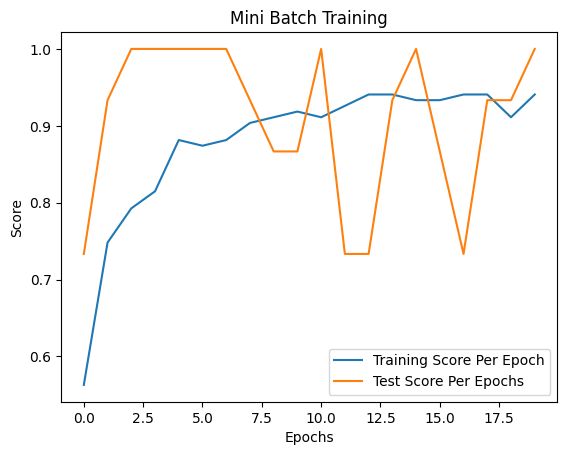

In [29]:
import matplotlib.pyplot as plt
x = [i for i in range(len(history))]
plt.plot(x, history, label = "Training Score Per Epoch")
plt.plot(x, test_score_per_epochs, label = "Test Score Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.legend()
plt.title("Mini Batch Training");

In [30]:
score(X_test, Y_test, W_1, B_1, W_2, B_2)

1.0

In [31]:
def predict(X, W_1, B_1, W_2, B_2):
    predictions = []
    for i in range(X.shape[0]):
        Z_1 = np.dot(X.iloc[i],W_1) + B_1
        A_1=activation_for_batch(Z_1,sigmoid)
        Z_2 = np.dot(A_1, W_2) + B_2
        A_2 =activation_for_batch(Z_2,softmax)
        #activated_output = np.zeros((actual_batch_size, 10))
        #expected_result = np.zeros((actual_batch_size,10))
        Z = activation(A_2)
        predictions.append(Z)
    return predictions

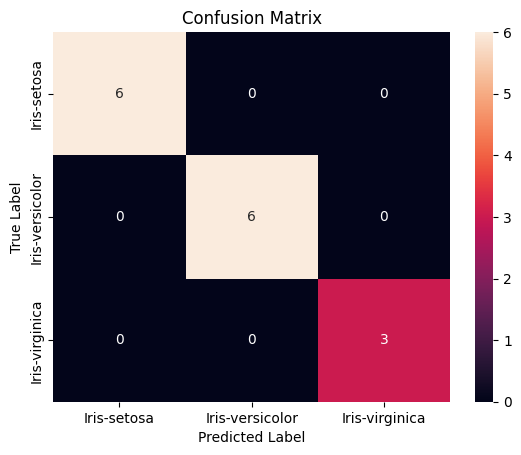

In [32]:
from sklearn.metrics import confusion_matrix
predictions = predict(X_test, W_1, B_1, W_2, B_2)
y_true = [i for i in Y_test]
y_pred = [i[0] for i in predictions]
plt.title("Confusion Matrix")
sns.heatmap(pd.DataFrame(confusion_matrix(y_true, y_pred), index=[i for i in list(set(lab.inverse_transform(Y_test)))], columns = [i for i in list(set(lab.inverse_transform(Y_test)))]), annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label");

In [33]:
missclassified = [y_true[i]!=y_pred[i] for i in range(len(y_true))]
test_analysis = X_test.assign(Missclassified=missclassified)
test_analysis

sepal_length  sepal_width  petal_length  petal_width  Missclassified
73            6.1          2.8           4.7          1.2           False
18            5.7          3.8           1.7          0.3           False
118           7.7          2.6           6.9          2.3           False
78            6.0          2.9           4.5          1.5           False
76            6.8          2.8           4.8          1.4           False
31            5.4          3.4           1.5          0.4           False
64            5.6          2.9           3.6          1.3           False
141           6.9          3.1           5.1          2.3           False
68            6.2          2.2           4.5          1.5           False
82            5.8          2.7           3.9          1.2           False
110           6.5          3.2           5.1          2.0           False
12            4.8          3.0           1.4          0.1           False
36            5.5          3.5           1.3          0.2           False
9             4.9          3.1           1.5          0.1           False
19            5.1          3.8           1.5          0.3           False

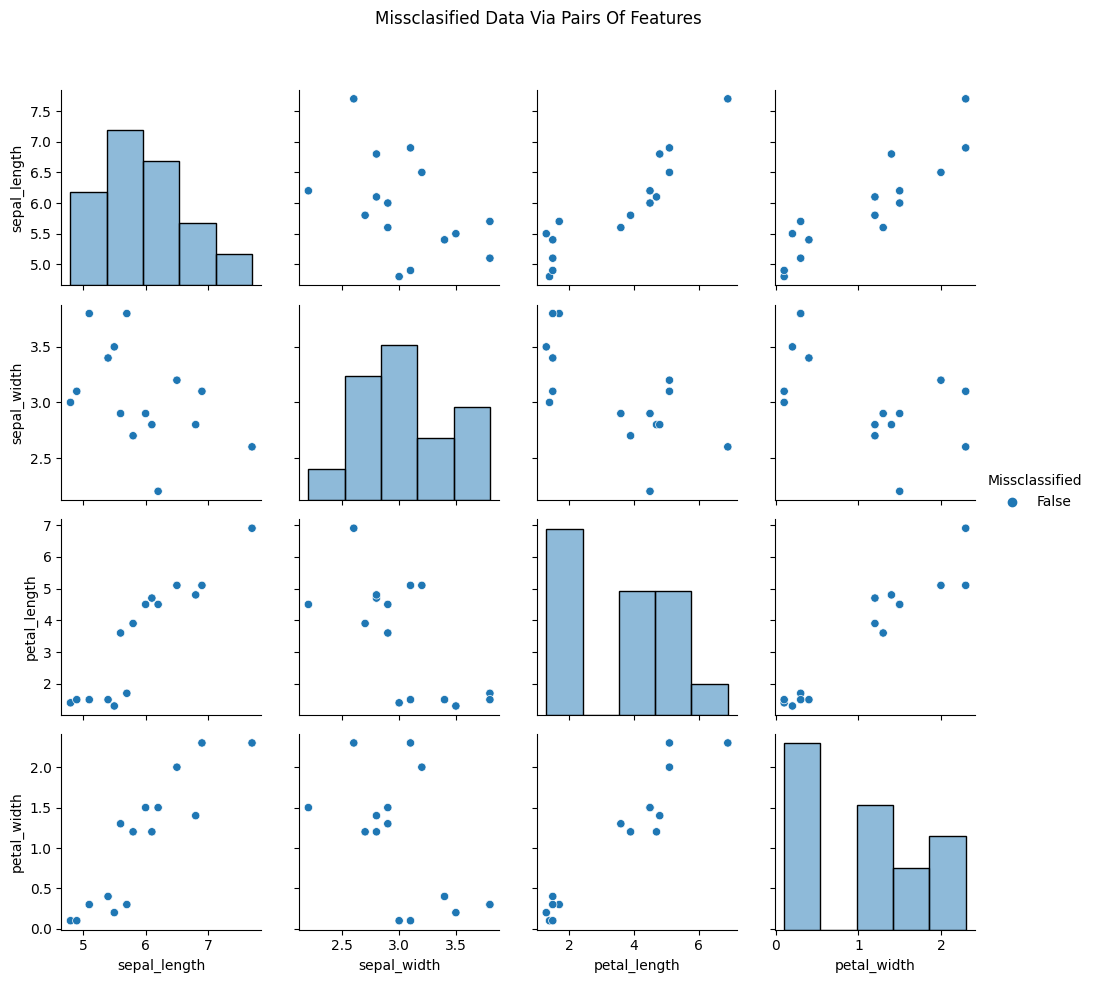

In [34]:
g = sns.PairGrid(test_analysis, hue="Missclassified")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Missclasified Data Via Pairs Of Features");